<a href="https://colab.research.google.com/github/rkaclfdl123/TIL/blob/master/%5B%EB%8D%B0%EC%9D%B4%EC%BD%98%5D%20%EC%98%81%ED%99%94%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20(%EB%AA%A8%EB%8D%B8%EB%A7%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

라이브러리 및 데이터


In [ ]:
import pandas as pd
import lightgbm as lgb

In [ ]:
train=pd.read_csv('/content/movies_train.csv')
test=pd.read_csv('/content/movies_test.csv')
submission=pd.read_csv('/content/submission.csv')

In [ ]:
train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [ ]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6.627000e+03
다큐멘터리,6.717226e+04
서스펜스,8.261100e+04
애니메이션,1.819267e+05
멜로/로맨스,4.259680e+05
미스터리,5.275482e+05
공포,5.908325e+05
드라마,6.256898e+05
코미디,1.193914e+06


In [ ]:
import seaborn as sns

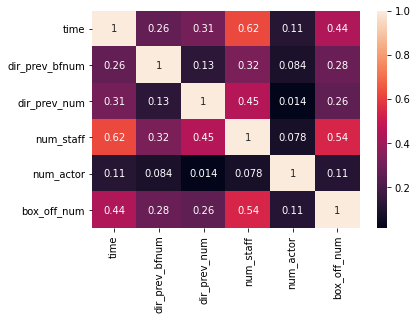

In [ ]:
sns.heatmap(train.corr(),annot=True)

In [ ]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [ ]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [ ]:
test['dir_prev_bfnum'].fillna(0, inplace = True)

In [ ]:
test

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1
...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,0.000000e+00,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,0.000000e+00,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7


In [ ]:
test[test['dir_prev_bfnum'].isna()]['dir_prev_num']

Series([], Name: dir_prev_num, dtype: int64)

In [ ]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)
#이거 수상자들이 많이 쓰는 라이트 GBM?
#부스팅 모델의 이종
#순차적으로 모델을 만듬
#따릉이에선 랜덤 포레스트 ( 배깅의 기법임)
#배깅은 병렬적
#순차적으로 하는 이유는 못맞춘것을 가중치를 조절해서 하는 것임
#틀린것 위주로 학습


In [ ]:
features=['time','dir_prev_num','num_staff','num_actor']
target= ['box_off_num']

In [ ]:
X_train,X_test,Y_train=train[features], test[features], train[target]

In [ ]:
model.fit(X_train, Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=777, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
singleLGBM = submission.copy()

In [ ]:
singleLGBM.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
singleLGBM['box_off_num'] = model.predict(X_test)

In [ ]:
singleLGBM.to_csv('singleLGBM.csv',index=False)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
k_fold=KFold(n_splits=5,shuffle=True, random_state=777)

In [ ]:
model =lgb.LGBMRegressor(random_state=777,n_estimators=1000)

models=[]
for train_idx, val_idx, in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = Y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = Y_train.iloc[val_idx]

  models.append(model.fit(x_t,y_t,eval_set=(x_val, y_val),early_stopping_rounds=100,verbose=100))
  #오차율이 더 이상 내려가지않으면 그만 멈춰라! 하는 것
  #early_stopping_rounds
  #verbose =100번째마다 출력해달라 다 말구

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.70572e+12
Early stopping, best iteration is:
[6]	valid_0's l2: 2.45438e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.90847e+12
Early stopping, best iteration is:
[33]	valid_0's l2: 3.72825e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.50344e+12
Early stopping, best iteration is:
[8]	valid_0's l2: 2.58737e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.45977e+12
Early stopping, best iteration is:
[11]	valid_0's l2: 1.26226e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.77214e+12
Early stopping, best iteration is:
[22]	valid_0's l2: 1.57631e+12


In [ ]:
preds=[]
for model in models:
  preds.append(model.predict(X_test))
len(preds)

5

In [ ]:
kfoldLightGBM=submission.copy()

In [ ]:
preds

[array([3367422.08211024,  961138.88337016, 1097929.67851313,
        2097270.81999921,  781476.31131047,  123133.23396977,
          84085.01896248,  199222.92670303,  124854.97973097,
        1072684.78820647,  657040.55769984, 1644701.47160779,
         924735.72080619,  191699.58415836,  723218.39948755,
        2395613.42888462,  113180.54906592, 1882765.92812296,
          97286.47282983,  417270.42113431,  161482.3367577 ,
          63495.73363115,  598057.42337284,  249411.25868881,
         308424.71884273, 1319518.60852241,  202273.52740684,
        1076683.13768137,  491636.41945325,  183406.6380314 ,
        1740233.45816734,   86696.17528125,  440430.29773088,
        2040944.13061099,  113375.45695331,  531746.29484356,
         106207.35971699,  169560.79581187,  158101.0895316 ,
          95037.29701059,  466355.50624629,  197548.63265325,
         198810.0901353 ,  682743.4340129 ,  679265.22397749,
         617812.91125278,  219182.85833837,   83712.10602149,
        

In [ ]:
import numpy as np

In [ ]:
kfoldLightGBM['box_off_num']=np.mean(preds,axis=0)

In [ ]:
kfoldLightGBM.head()


,title,box_off_num
0,용서는 없다,3.367422e+06
1,아빠가 여자를 좋아해,9.611389e+05
2,하모니,1.097930e+06
3,의형제,2.097271e+06
4,평행 이론,7.814763e+05


In [ ]:
kfoldLightGBM.to_csv('kfoldLightGBM.csv', index=False)

In [ ]:
 from sklearn import preprocessing
 le=preprocessing.LabelEncoder()
 train['genre']=le.fit_transform(train['genre'])
 #fit_transform

In [ ]:
test['genre']

0       2
1       5
2       4
3      10
4       1
       ..
238     4
239     3
240     2
241     4
242     5
Name: genre, Length: 243, dtype: int64

In [ ]:
test['genre'] = le.fit_transform(test['genre'])
#transform 만함 fittransform 할 필요없음


In [ ]:
features=['time','dir_prev_num', 'num_staff','num_actor','dir_prev_bfnum','genre']

In [ ]:
X_train, X_test,Y_train=train[features], test[features], train[target]

In [ ]:
model =lgb.LGBMRegressor(random_state=777,n_estimators=1000)

models=[]
for train_idx, val_idx, in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = Y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = Y_train.iloc[val_idx]

  models.append(model.fit(x_t,y_t,eval_set=(x_val, y_val),early_stopping_rounds=100,verbose=100))
  

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.62067e+12
Early stopping, best iteration is:
[9]	valid_0's l2: 2.42668e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.39227e+12
Early stopping, best iteration is:
[23]	valid_0's l2: 3.97173e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.29841e+12
Early stopping, best iteration is:
[10]	valid_0's l2: 2.53643e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.56499e+12
Early stopping, best iteration is:
[16]	valid_0's l2: 1.21201e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.60118e+12
Early stopping, best iteration is:
[29]	valid_0's l2: 1.47528e+12


In [ ]:
preds=[]
for model in models:
  preds.append(model.predict(X_test))
len(preds)

5

In [ ]:
X_test

,time,dir_prev_num,num_staff,num_actor,dir_prev_bfnum,genre
0,125,2,304,3,3.005290e+05,느와르
1,113,4,275,3,3.427002e+05,멜로/로맨스
2,115,3,419,7,4.206611e+06,드라마
3,116,2,408,2,6.913420e+05,액션
4,110,1,380,1,3.173800e+04,공포
...,...,...,...,...,...,...
238,78,1,4,4,2.590000e+03,드라마
239,86,0,18,2,0.000000e+00,다큐멘터리
240,107,0,224,4,0.000000e+00,느와르
241,102,1,68,7,5.069900e+04,드라마


In [ ]:
X_test.head()

,time,dir_prev_num,num_staff,num_actor,dir_prev_bfnum,genre
0,125,2,304,3,3.005290e+05,2
1,113,4,275,3,3.427002e+05,5
2,115,3,419,7,4.206611e+06,4
3,116,2,408,2,6.913420e+05,10
4,110,1,380,1,3.173800e+04,1


In [ ]:
feLightGBM=submission.copy()

In [ ]:
feLightGBM['box_off_num']=np.mean(preds, axis=0)

In [ ]:
feLightGBM.to_csv('feLightGBM.csv',index =False)